In [1]:
from datetime import date
from nsepy import get_history
import pandas as pd

In [2]:
def obtain_data(ticker,start,end):
# Enter the start and end dates using the method date(yyyy,m,dd)    
    stock=get_history(symbol=ticker,start=start,end=end)
    df=stock.copy()
    df=df.reset_index()
    df=df.drop(['Series','Prev Close','Last','Turnover','%Deliverble','Trades'],axis=1)
    df=df.rename({'Open':'open_price','Close':'close_price','High':'high','Low':'low','Volume':'volume'},axis='columns')
    df.index=df.Date
    return df

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
"""This cell defineds the plot_candles function"""

def plot_candles(pricing, title=None, volume_bars=False, color_function=None, technicals=None):
    """ Plots a candlestick chart using quantopian pricing data.
    
    Author: Daniel Treiman
    
    Args:
      pricing: A pandas dataframe with columns ['open_price', 'close_price', 'high', 'low', 'volume']
      title: An optional title for the chart
      volume_bars: If True, plots volume bars
      color_function: A function which, given a row index and price series, returns a candle color.
      technicals: A list of additional data series to add to the chart.  Must be the same length as pricing.
    """
    def default_color(index, open_price, close_price, low, high):
        return 'r' if open_price[index] > close_price[index] else 'g'
    color_function = color_function or default_color
    technicals = technicals or []
    open_price = pricing['open_price']
    close_price = pricing['close_price']
    low = pricing['low']
    high = pricing['high']
    oc_min = pd.concat([open_price, close_price], axis=1).min(axis=1)
    oc_max = pd.concat([open_price, close_price], axis=1).max(axis=1)
    
    if volume_bars:
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3,1]},figsize=(7,7))
    else:
        fig, ax1 = plt.subplots(1, 1)
    if title:
        ax1.set_title(title)
    fig.tight_layout()
    x = np.arange(len(pricing))
    candle_colors = [color_function(i, open_price, close_price, low, high) for i in x]
    candles = ax1.bar(x, oc_max-oc_min, bottom=oc_min, color=candle_colors, linewidth=0)
    lines = ax1.vlines(x , low, high, color=candle_colors, linewidth=1)
    ax1.xaxis.grid(True)
    ax1.yaxis.grid(True)
    ax1.xaxis.set_tick_params(which='major', length=3.0, direction='in', top='off')
    ax1.set_yticklabels([])
    # Assume minute frequency if first two bars are in the same day.
    frequency = 'minute' if (pricing.index[1] - pricing.index[0]).days == 0 else 'day'
    time_format = '%d-%m-%Y'
    if frequency == 'minute':
        time_format = '%H:%M'
    # Set X axis tick labels.
    #plt.xticks(x, [date.strftime(time_format) for date in pricing.index], rotation='vertical')
    for indicator in technicals:
        ax1.plot(x, indicator)
    
    if volume_bars:
        volume = pricing['volume']
        volume_scale = None
        scaled_volume = volume
        if volume.max() > 1000000:
            volume_scale = 'M'
            scaled_volume = volume / 1000000
        elif volume.max() > 1000:
            volume_scale = 'K'
            scaled_volume = volume / 1000
        ax2.bar(x, scaled_volume, color=candle_colors)
        volume_title = 'Volume'
        if volume_scale:
            volume_title = 'Volume (%s)' % volume_scale
        #ax2.set_title(volume_title)
        ax2.xaxis.grid(True)
        ax2.set_yticklabels([])
        ax2.set_xticklabels([])
    return fig    

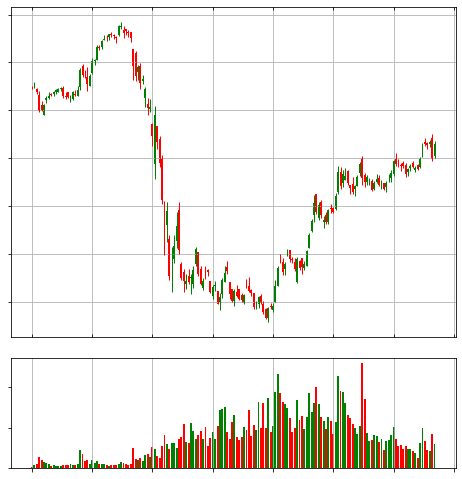

In [77]:
fig=plot_candles(df_pricing,volume_bars=True)

In [78]:
fig.savefig('Candle Data/Down/Testing.jpeg',dpi=70)

In [63]:
df=df_pricing.copy()
df=df.reset_index(drop=True)

Down 0 3
Down 1 2
Down 2 1
Up 3 4
Up 4 4
Up 16 4
Up 17 3
Up 18 2
Up 19 1
Up 22 4
Up 23 2
Up 24 2
Up 25 4
Up 26 3
Down 38 4
Down 39 3
Down 40 2
Down 41 1
Down 42 3
Down 44 1
Down 45 3
Down 46 2
Down 47 1
Down 48 2
Down 49 1
Up 50 1
Down 51 1
Down 52 1
Down 53 1


<ipython-input-6-5b988a81b1f4>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3,1]},figsize=(7,7))


Down 54 1
Up 55 1
Down 56 1
Up 57 1
Up 58 1
Up 59 1
Down 60 1
Down 61 1
Up 63 4
Up 64 3
Up 65 2
Up 66 2
Up 67 1
Down 68 1
Down 69 1
Up 70 2
Up 71 1
Down 72 2
Down 73 1
Down 74 3
Down 75 2
Down 76 1
Up 77 2
Up 78 1
Up 79 2
Down 80 2
Down 81 1
Down 82 1
Up 83 1
Down 84 2
Up 85 4
Up 86 3
Up 87 2
Up 88 1
Down 89 3
Down 90 2
Down 91 1
Up 92 2
Up 93 1
Down 94 2
Down 95 1
Up 97 1
Up 98 3
Up 99 2
Up 100 1
Up 101 1
Up 102 4
Down 103 1
Up 104 2
Up 105 1
Down 106 3
Down 107 2
Down 108 1
Up 109 1
Down 110 1
Up 111 3
Up 112 2
Up 113 1
Up 114 1
Up 115 1
Up 116 1
Down 117 3
Down 119 2
Up 121 3
Up 122 1
Up 123 3
Up 124 2
Up 125 1
Up 126 1
Down 127 1
Up 128 1
Down 129 3
Down 130 2
Up 132 4
Up 133 2
Up 134 2
Up 135 1
Down 136 1
Down 139 2
Up 146 3
Up 147 3
Up 148 2
Up 158 4
Up 159 3
Up 160 2
Up 161 1
Down 162 4
Down 163 3
Down 164 2
Down 165 1
Up 166 1
167


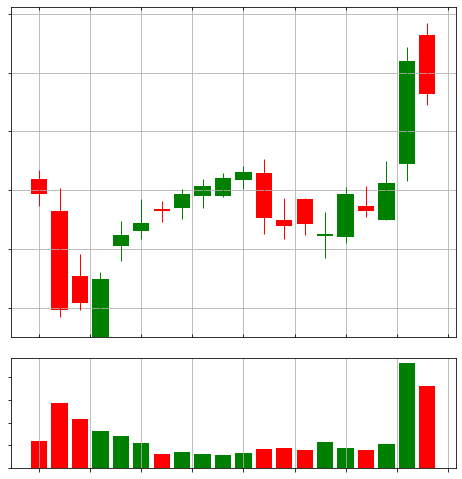

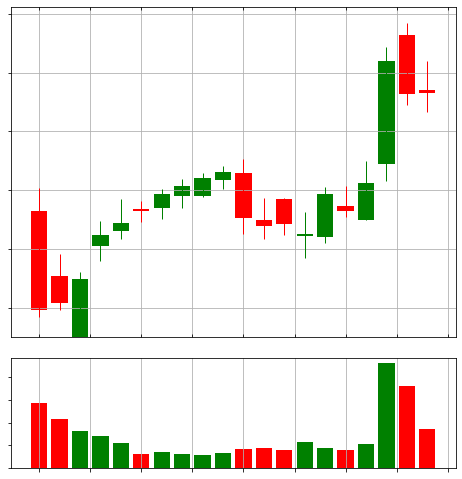

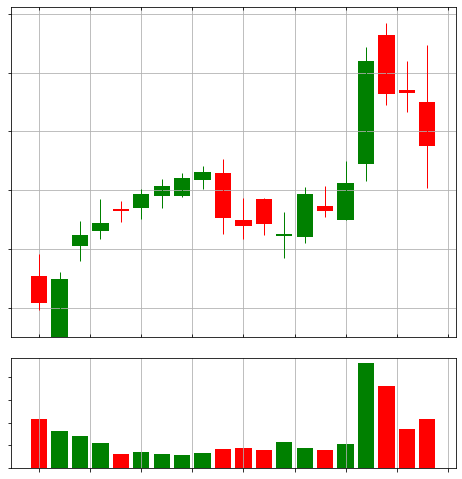

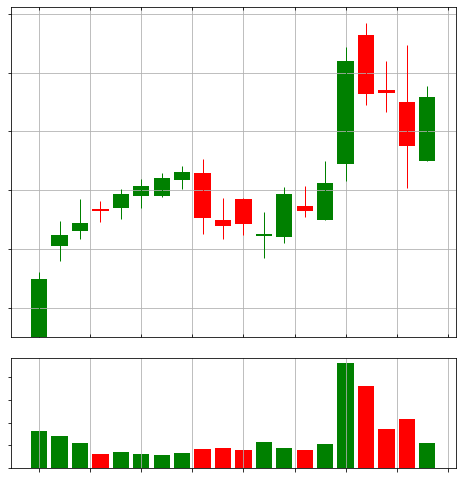

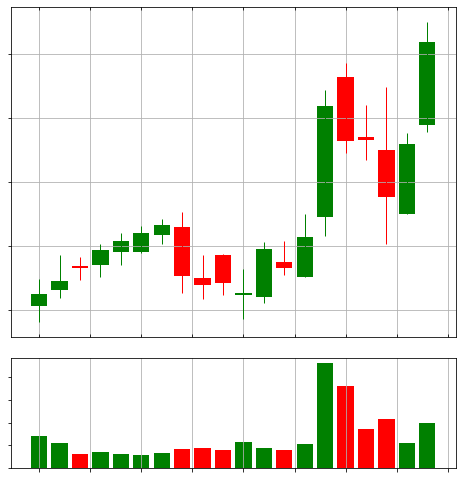

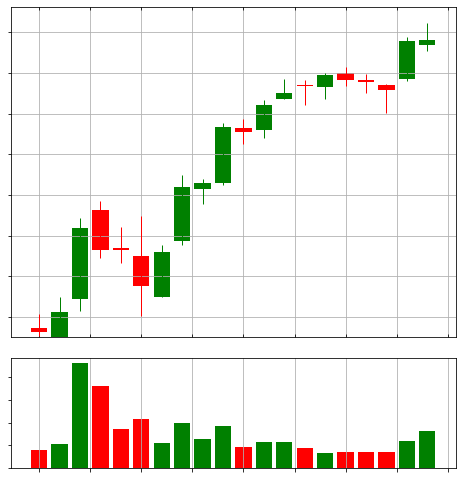

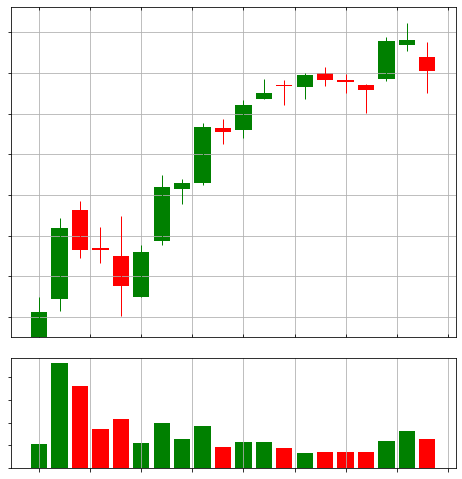

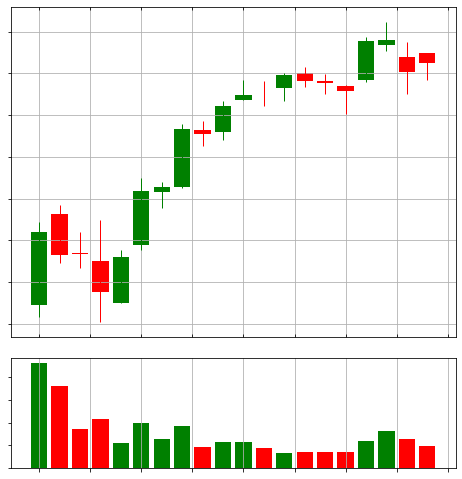

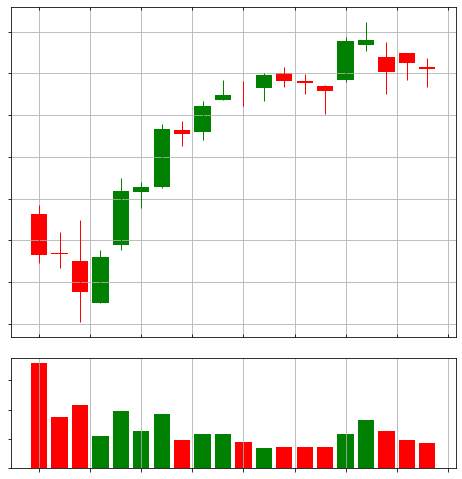

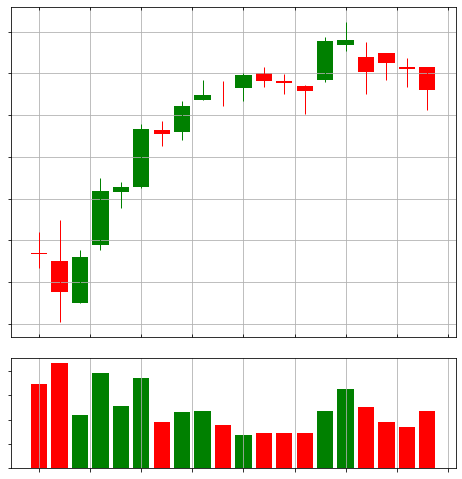

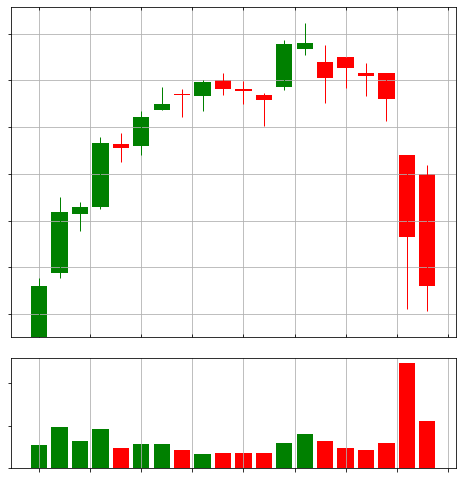

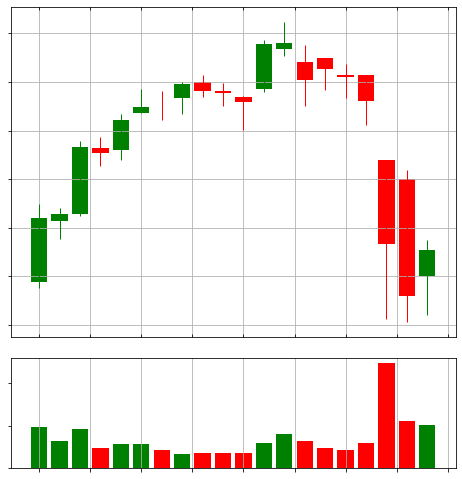

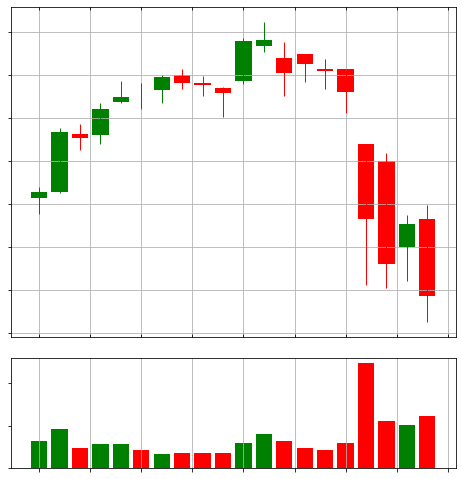

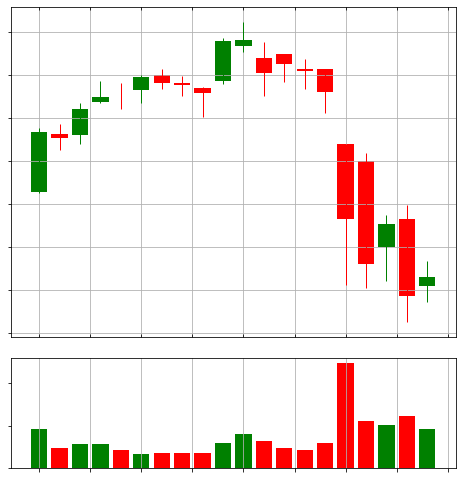

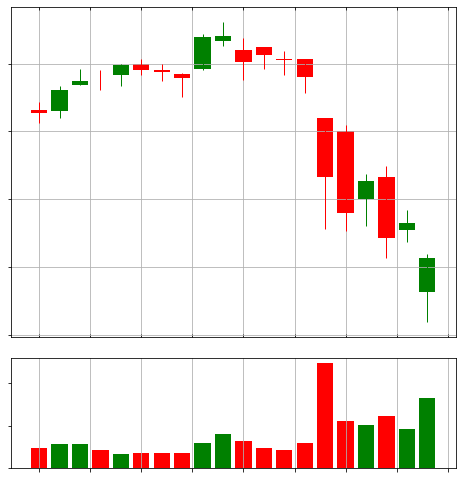

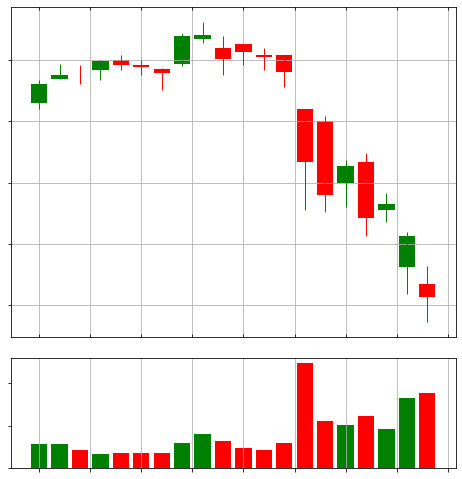

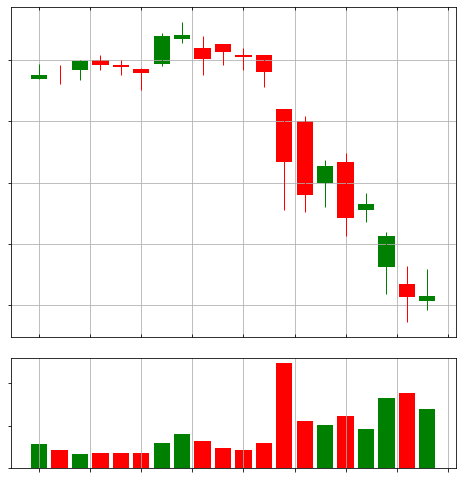

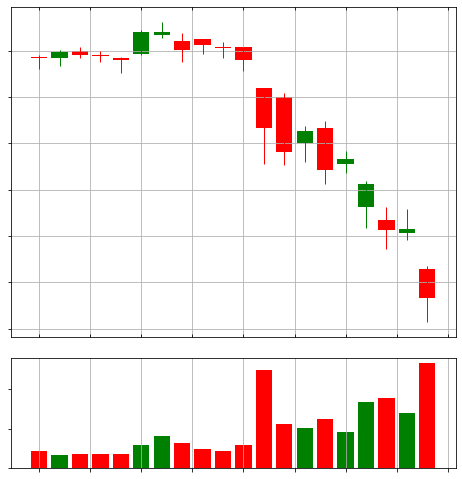

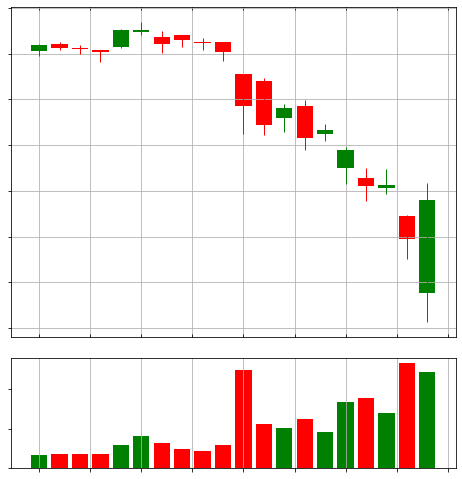

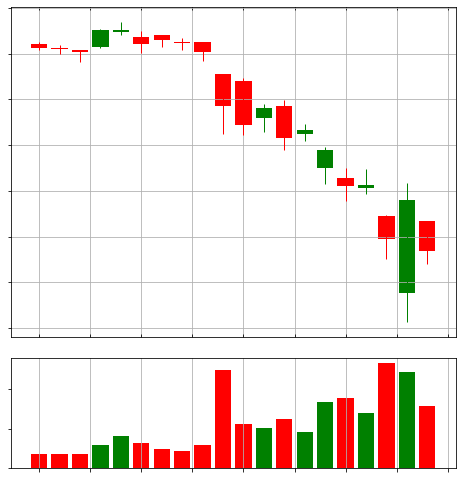

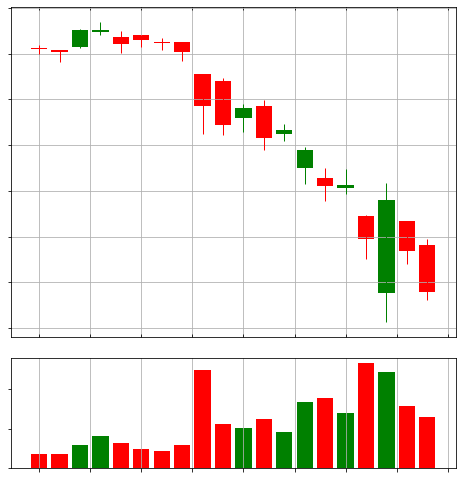

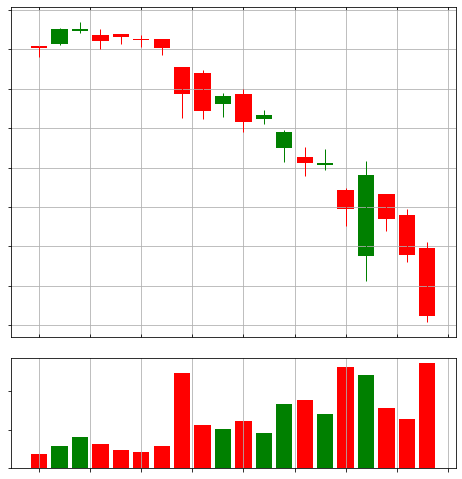

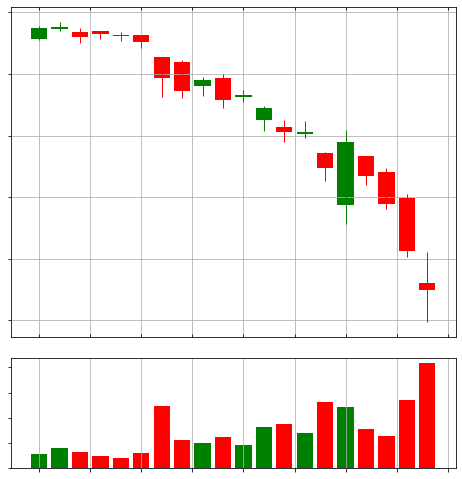

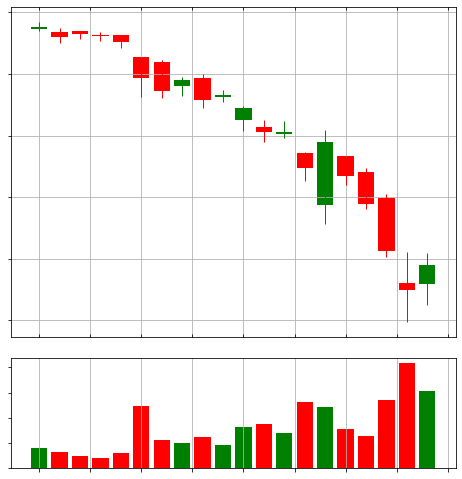

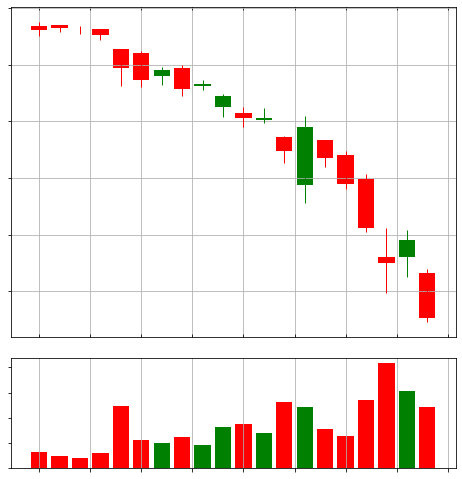

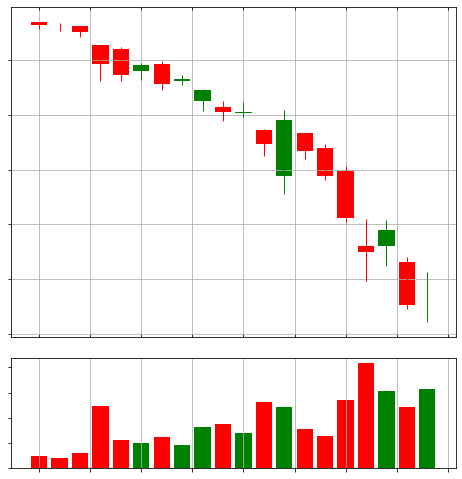

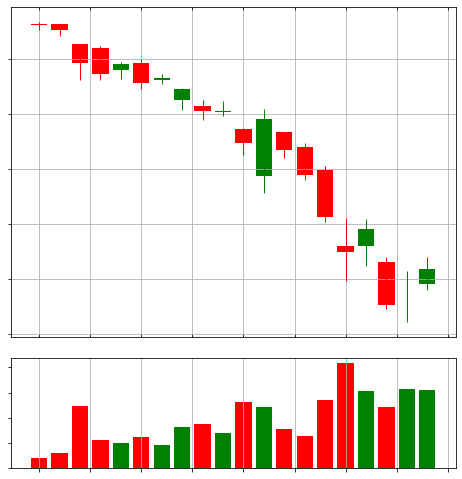

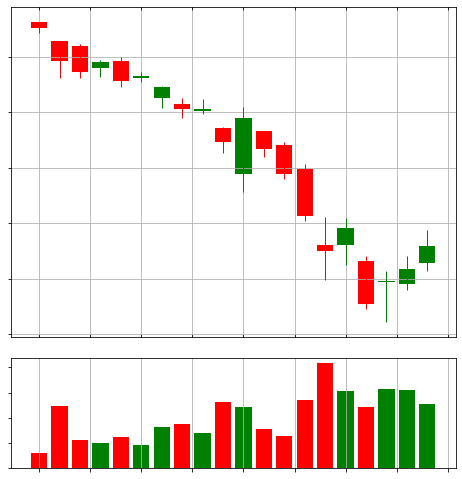

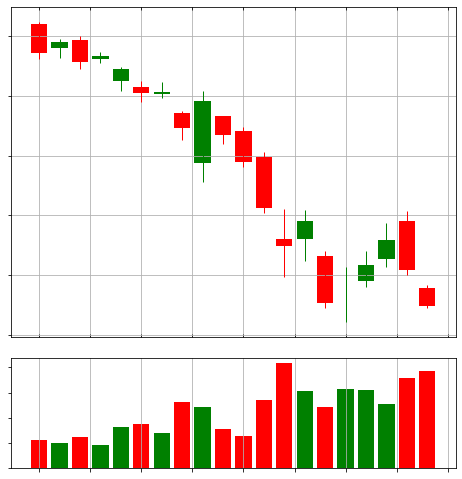

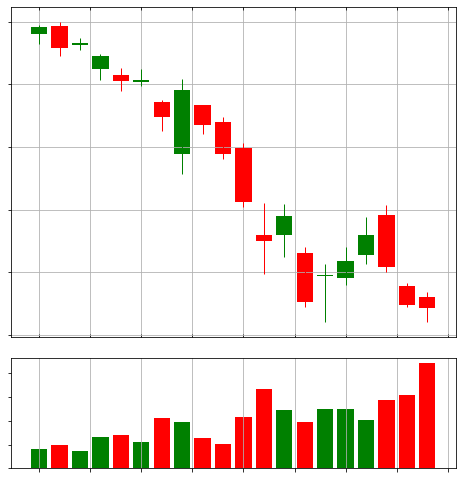

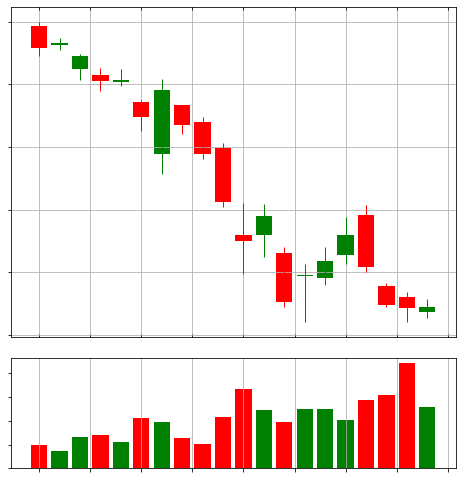

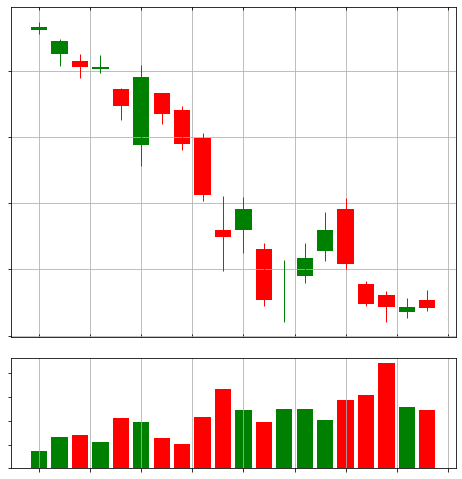

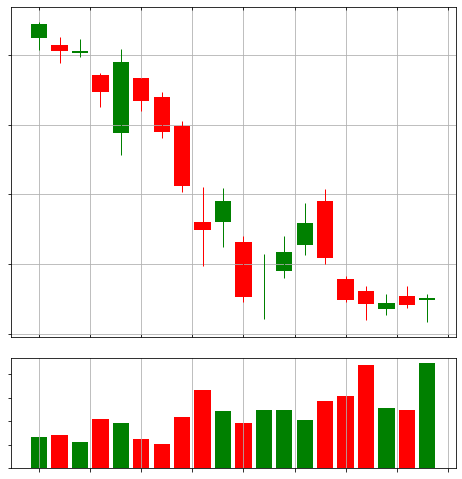

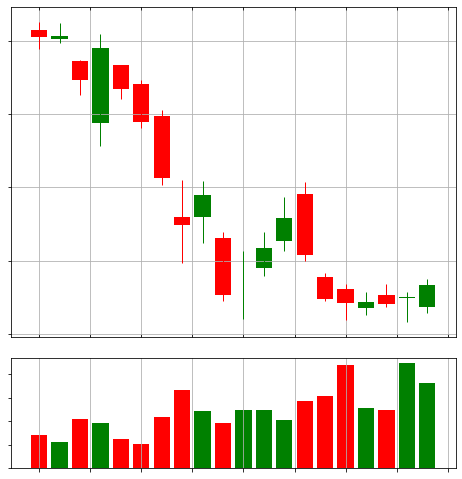

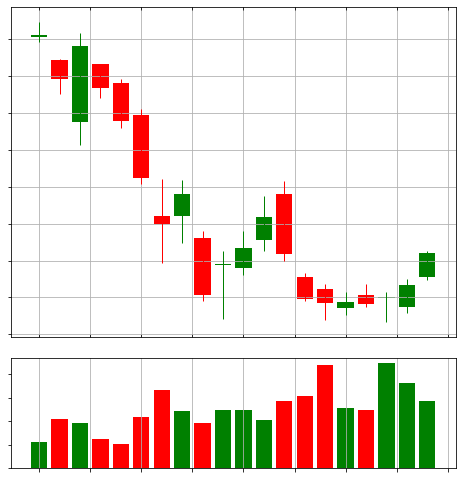

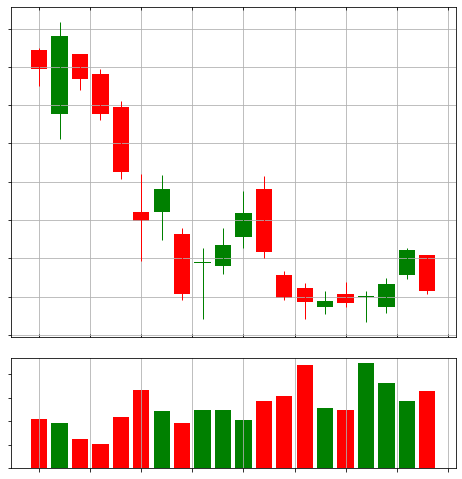

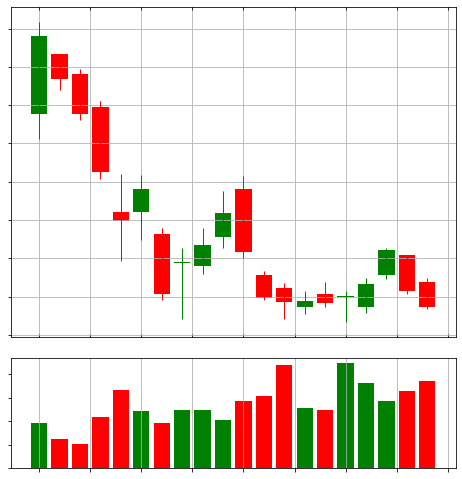

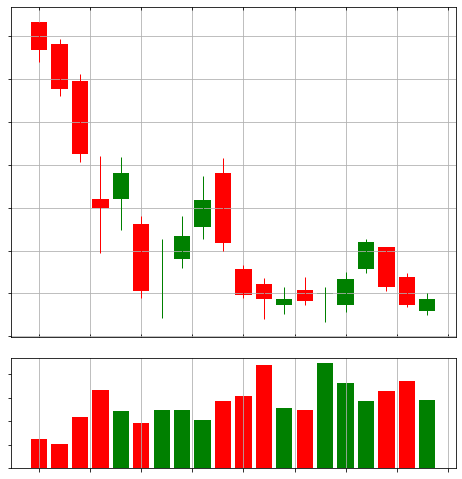

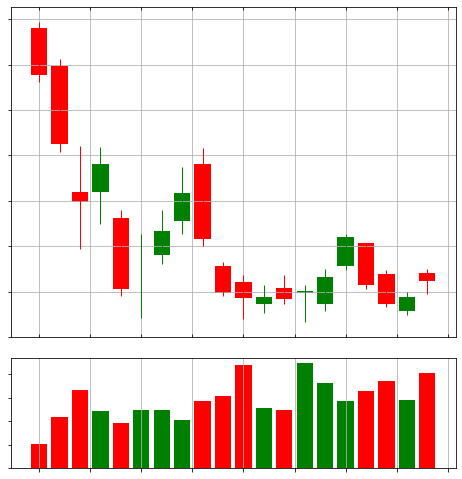

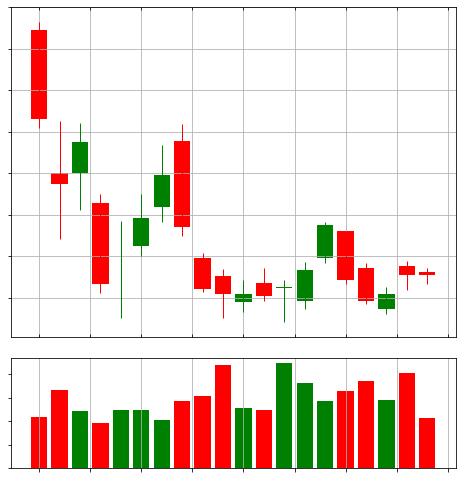

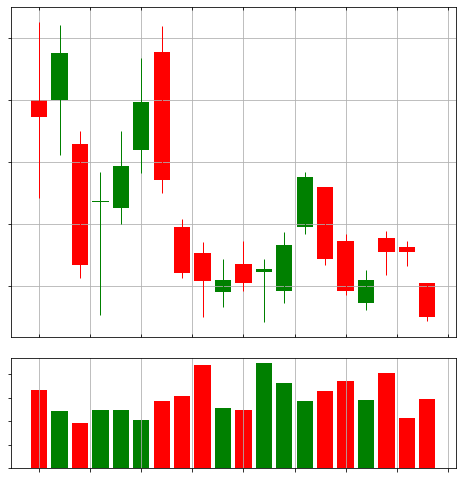

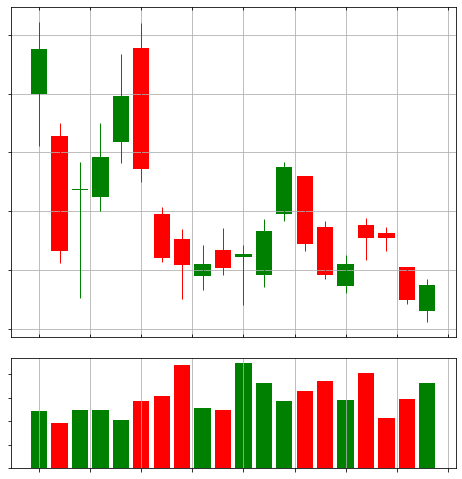

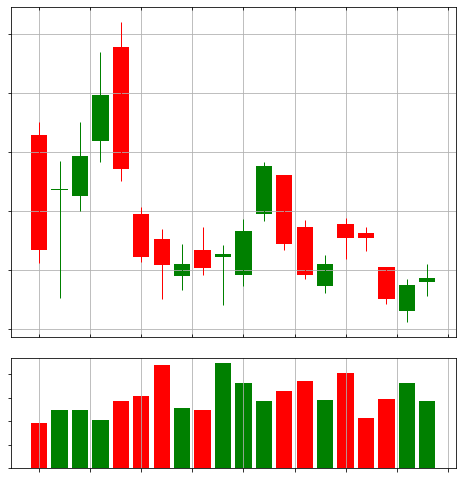

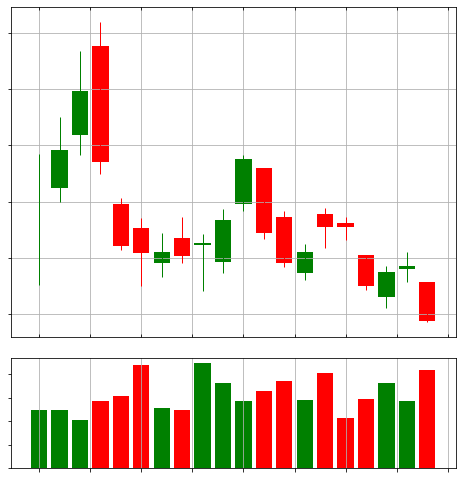

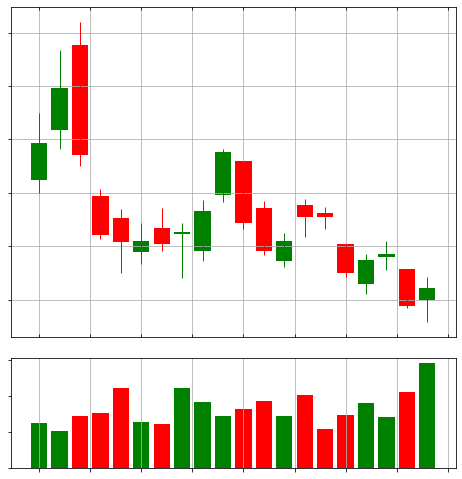

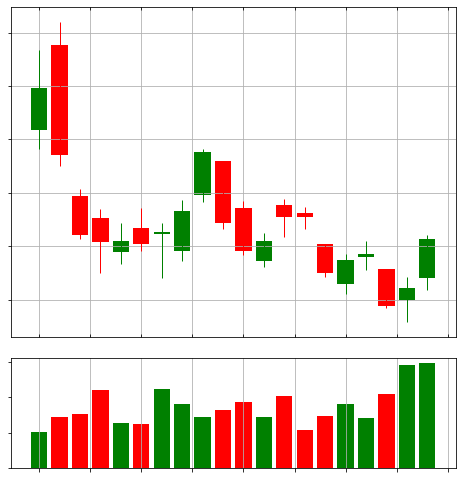

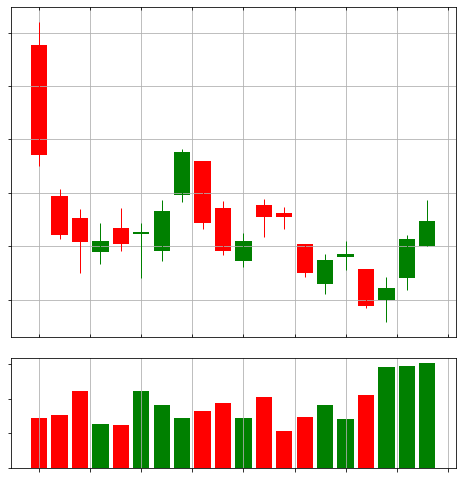

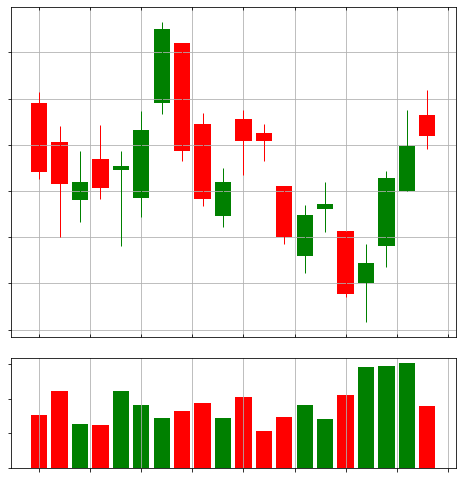

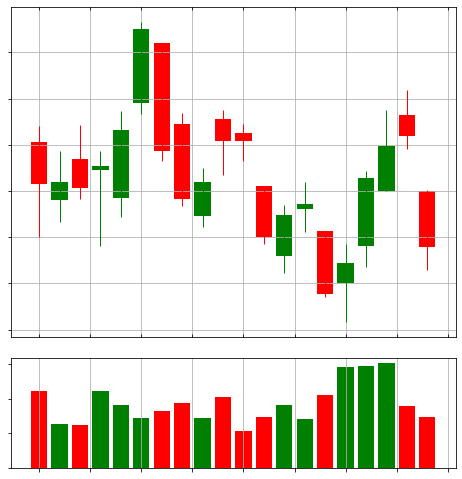

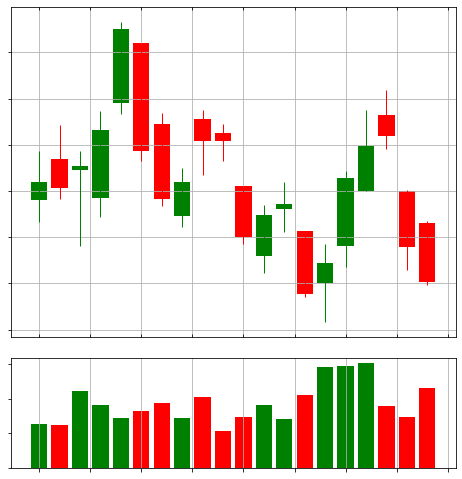

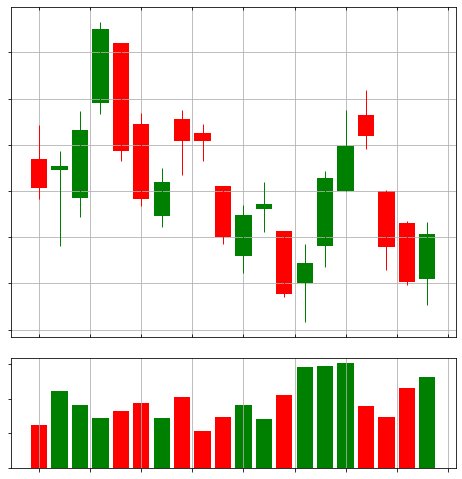

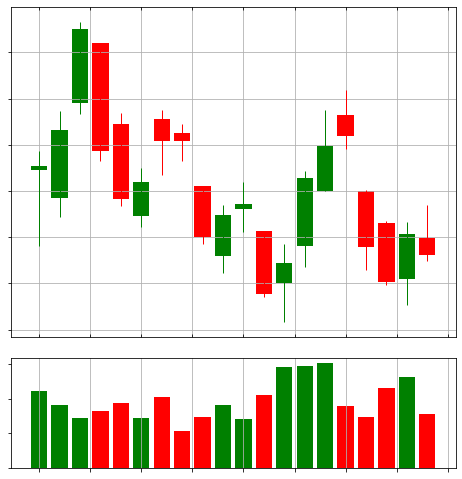

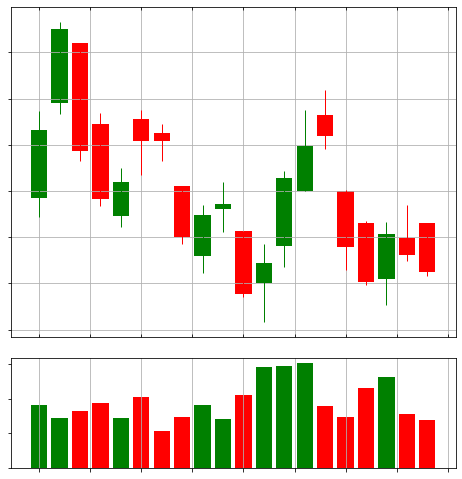

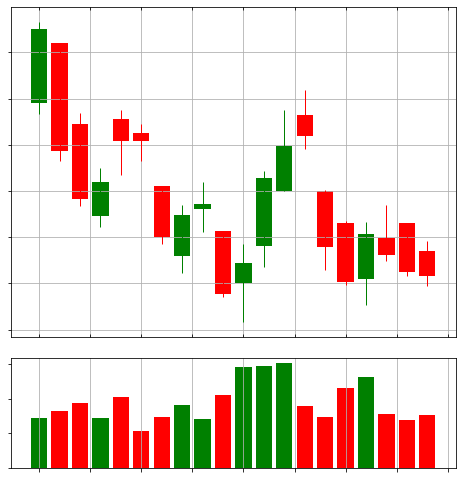

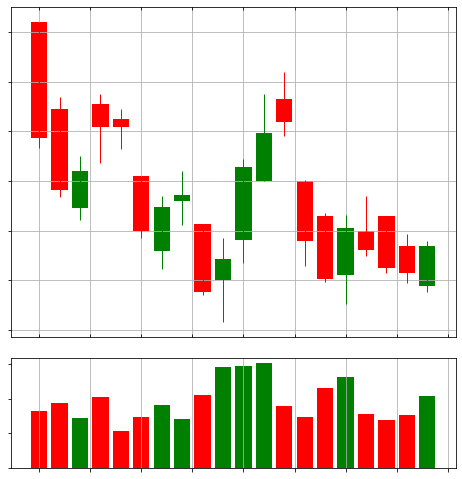

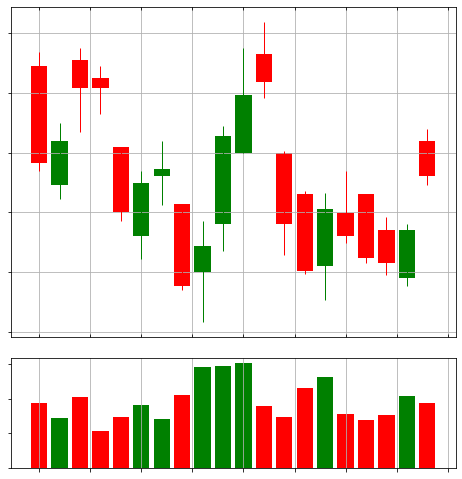

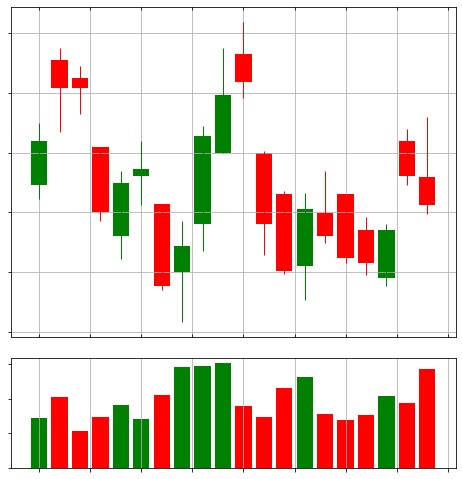

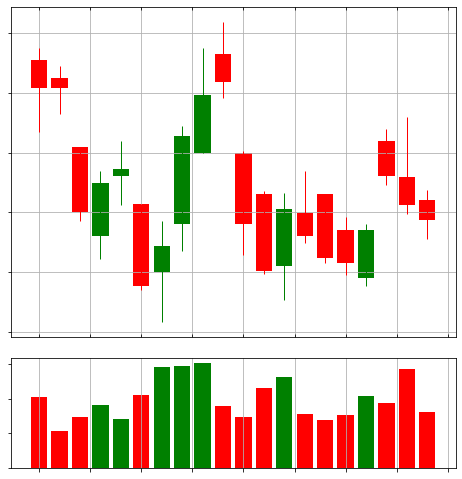

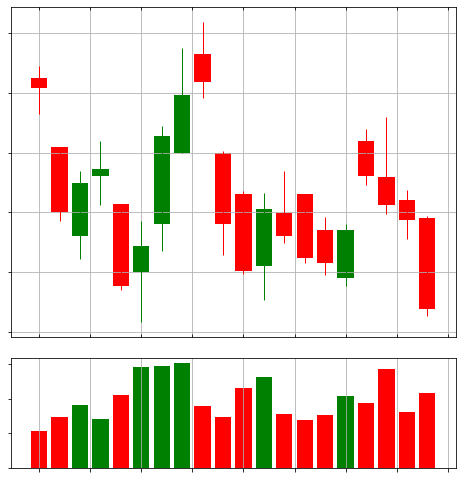

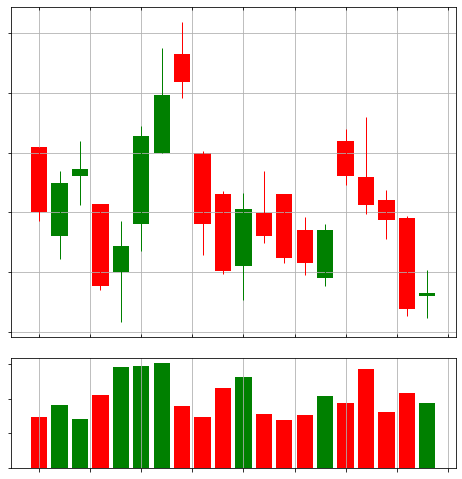

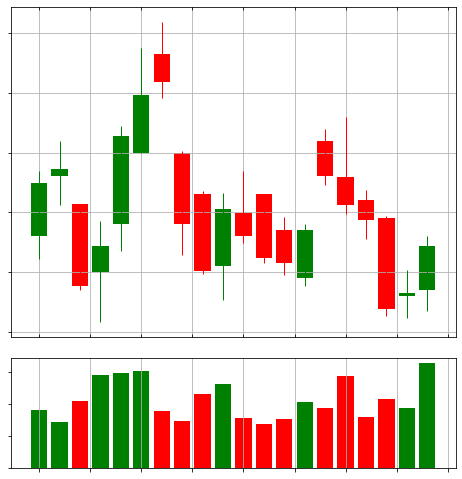

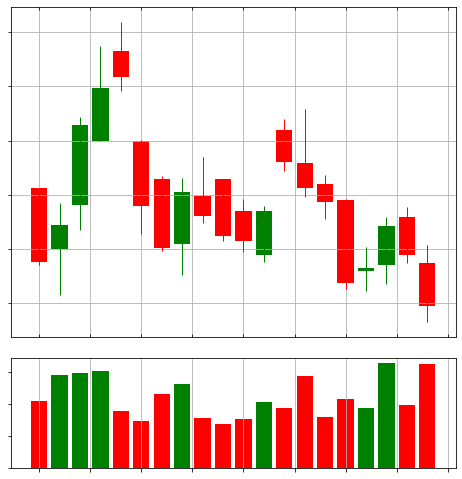

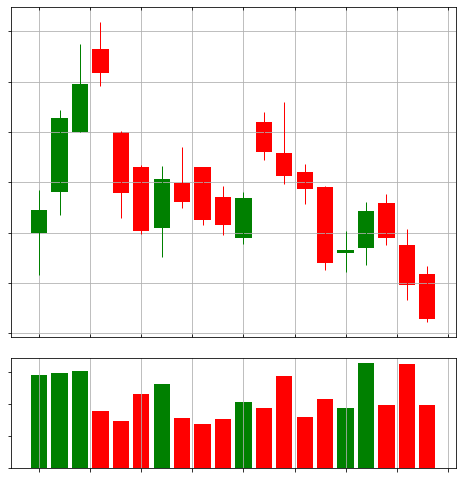

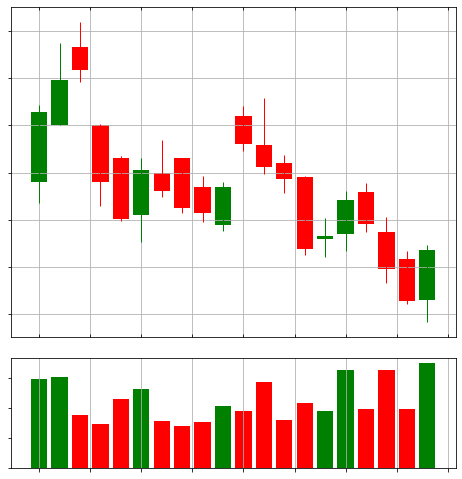

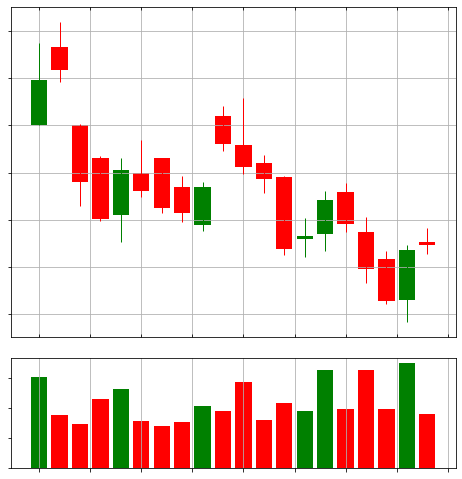

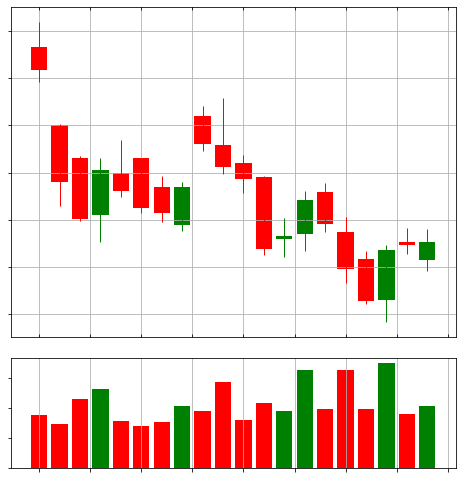

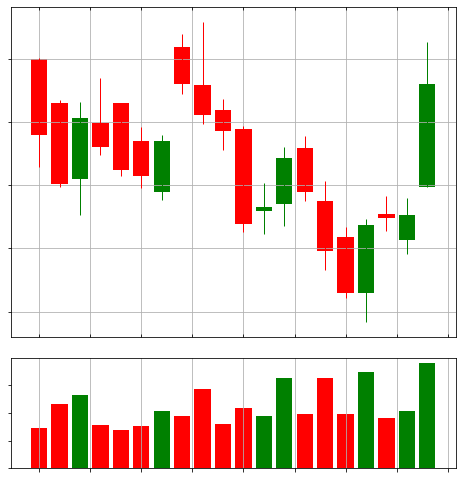

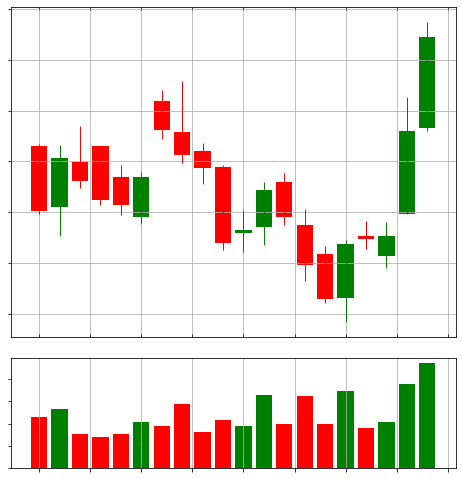

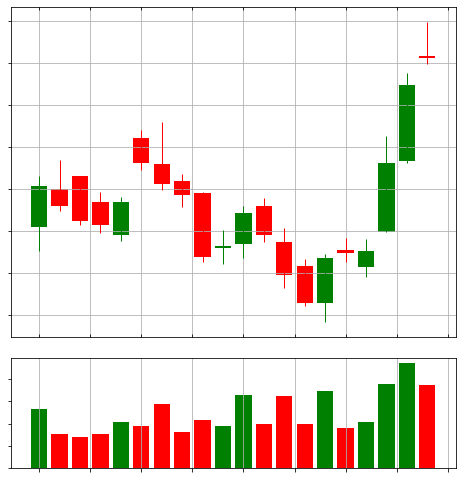

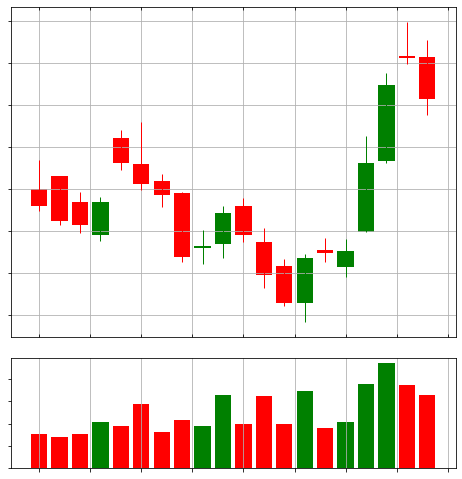

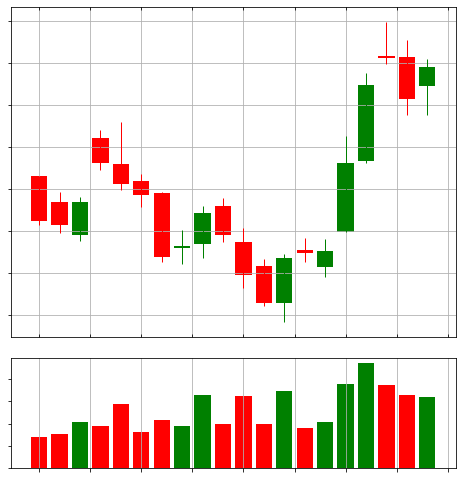

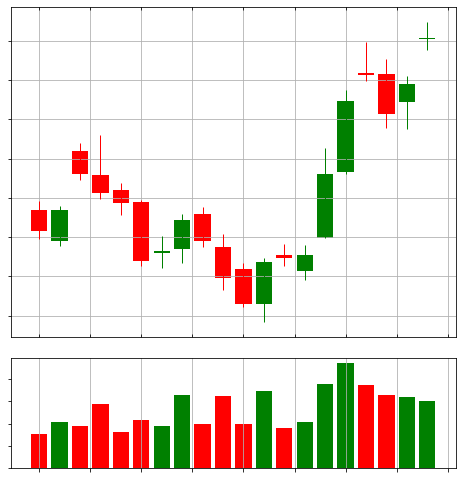

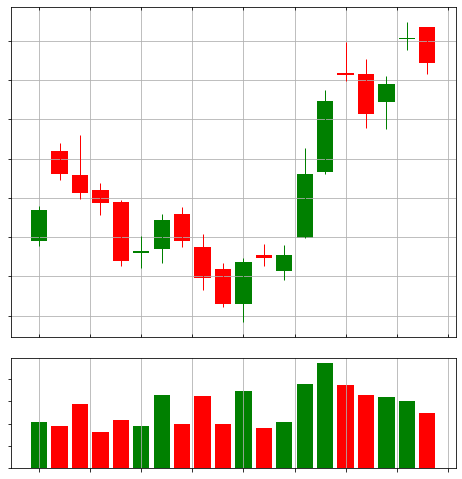

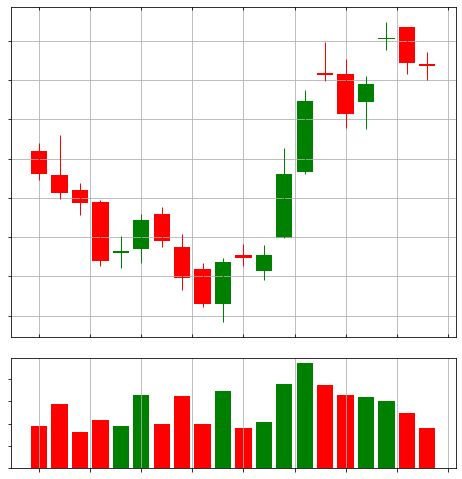

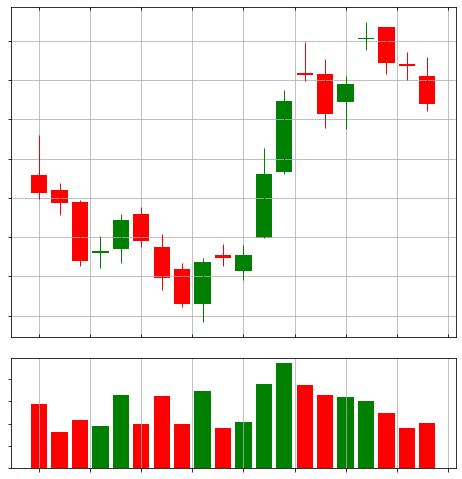

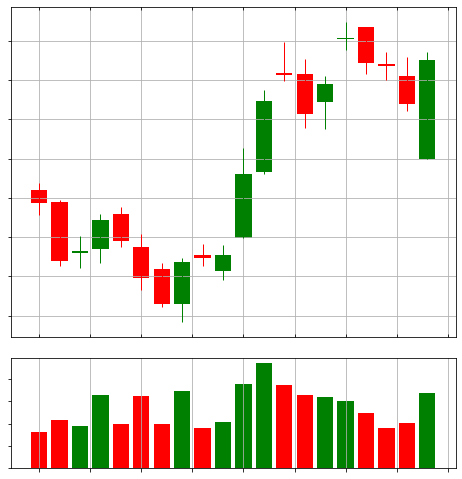

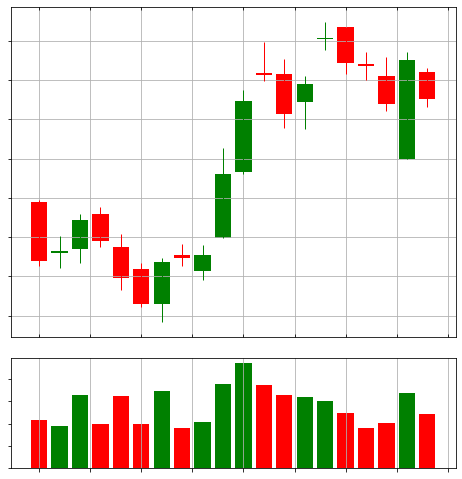

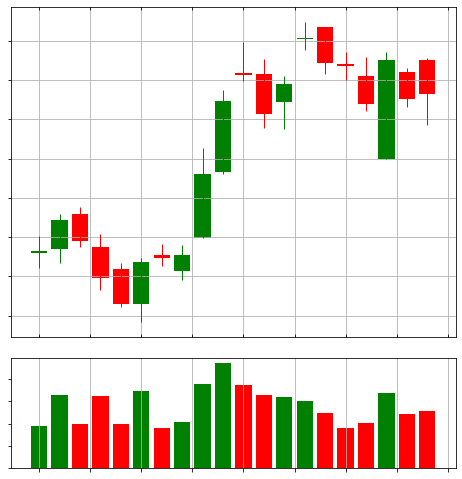

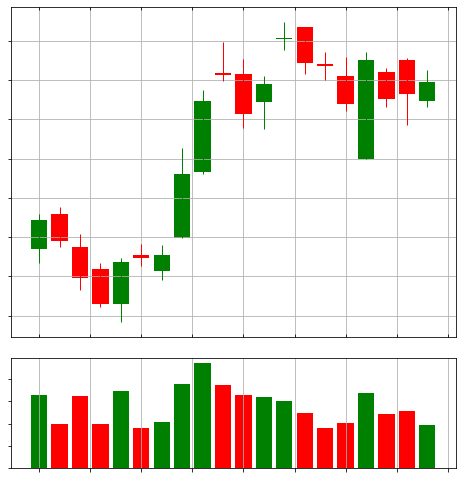

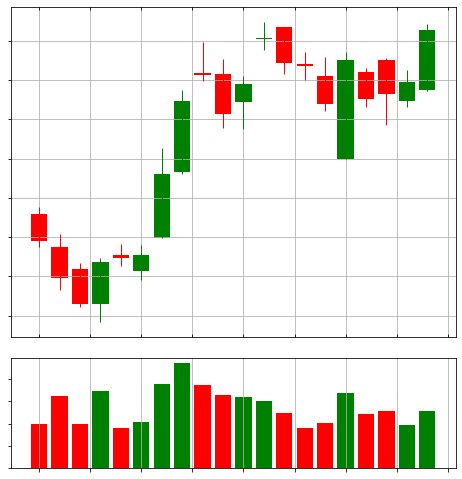

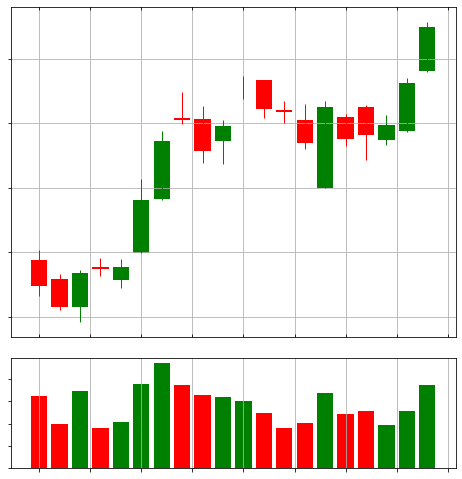

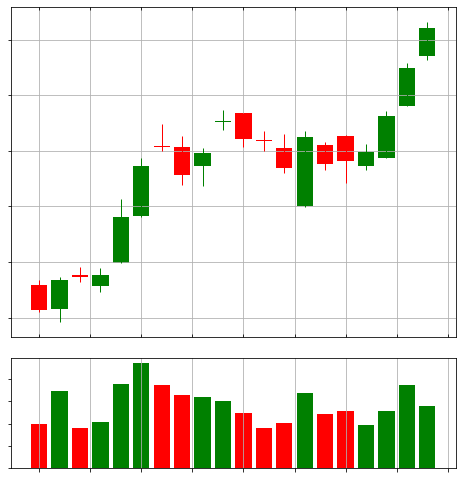

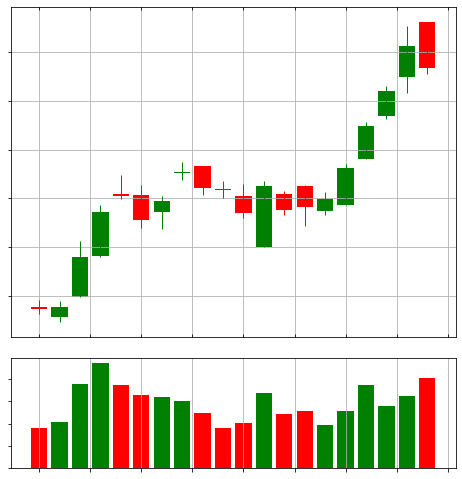

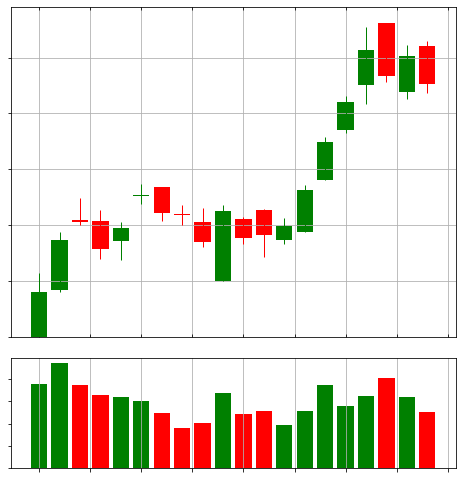

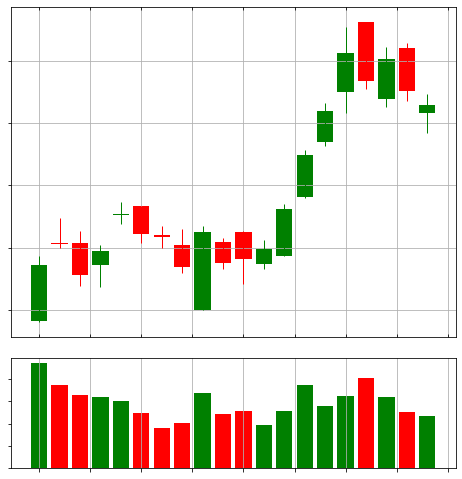

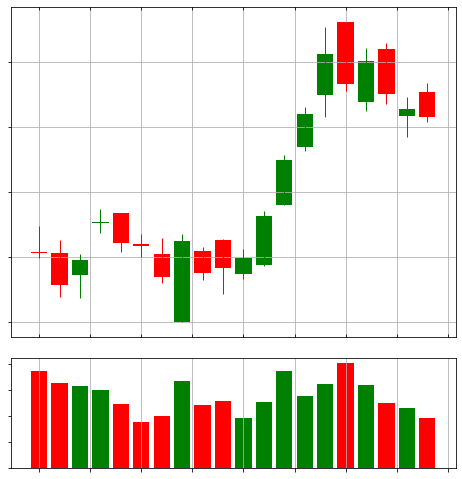

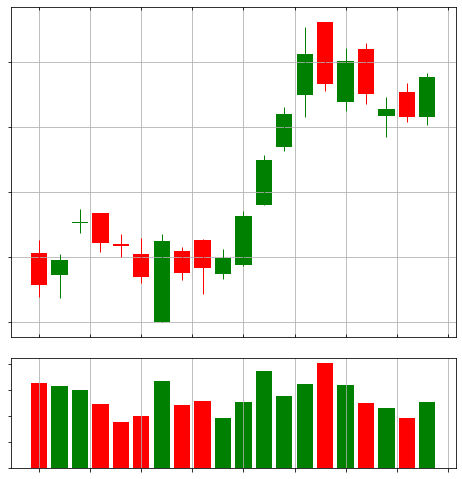

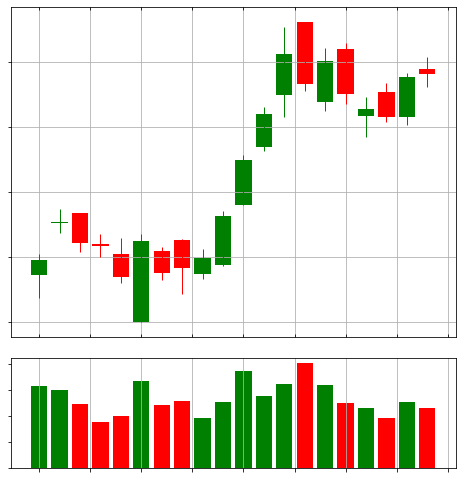

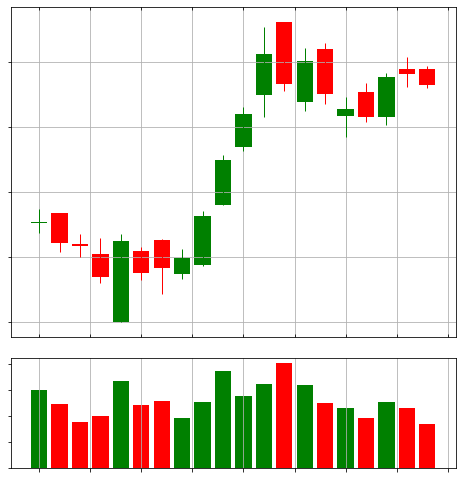

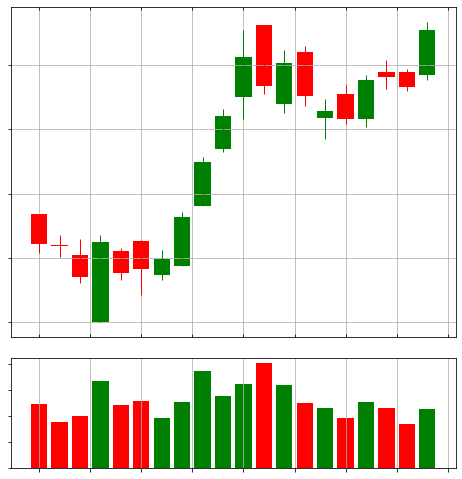

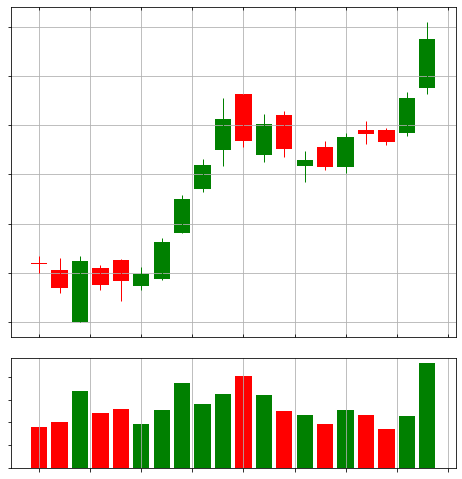

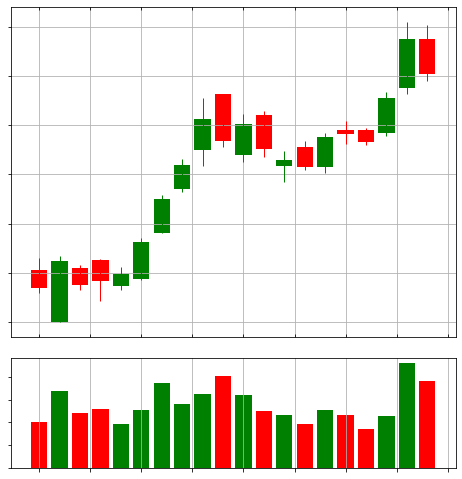

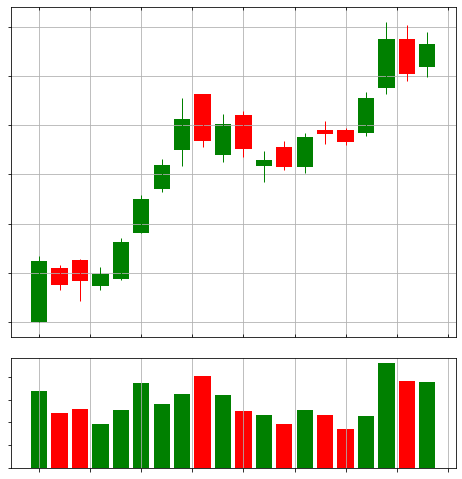

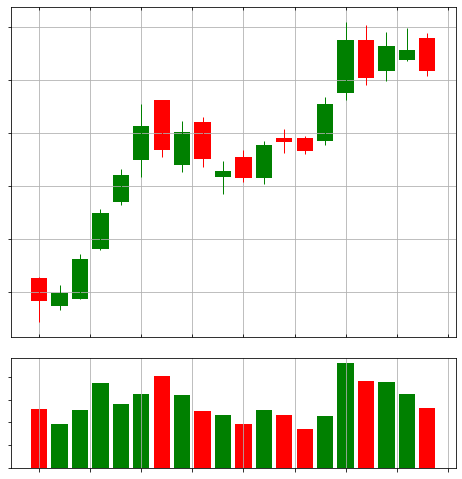

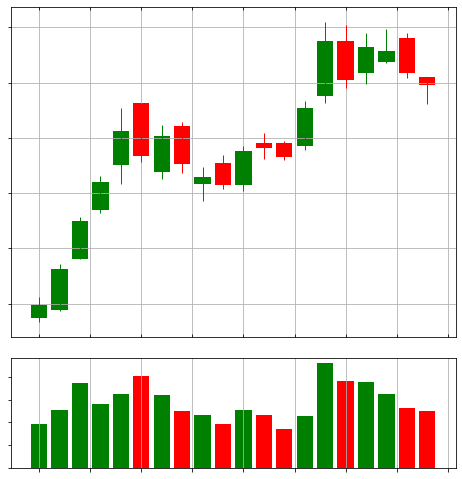

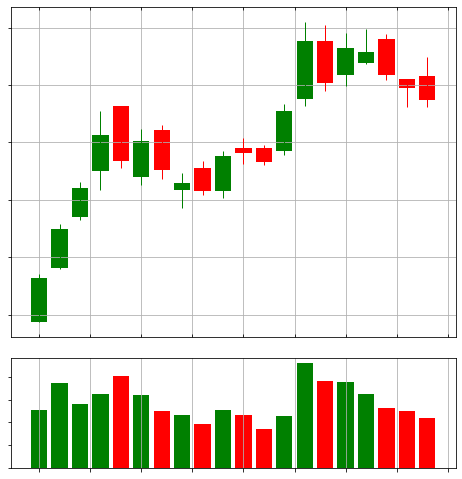

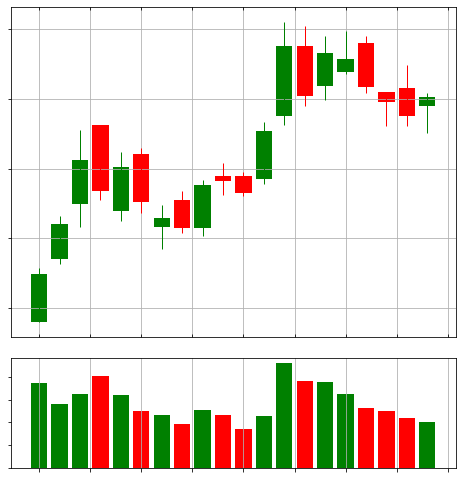

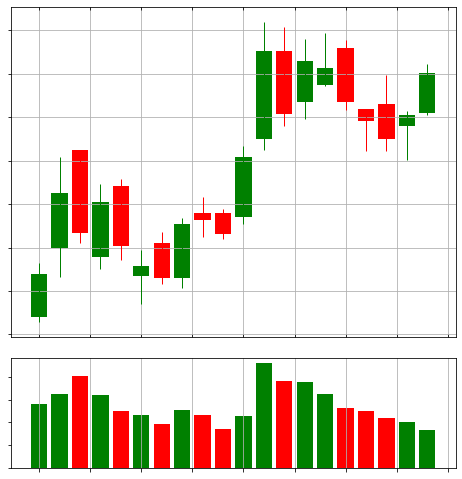

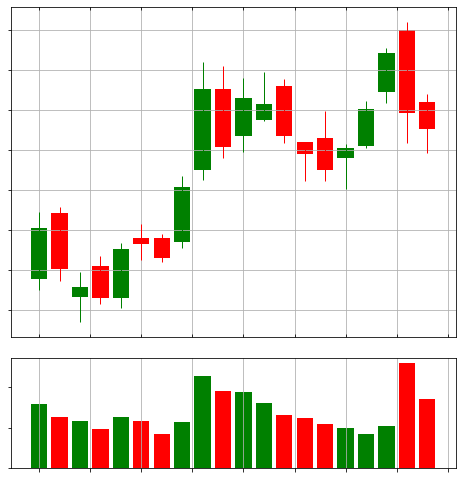

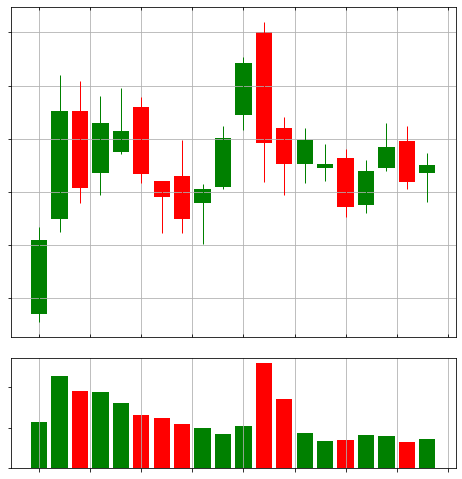

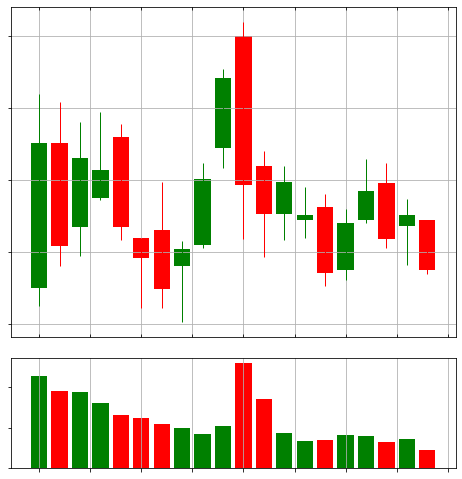

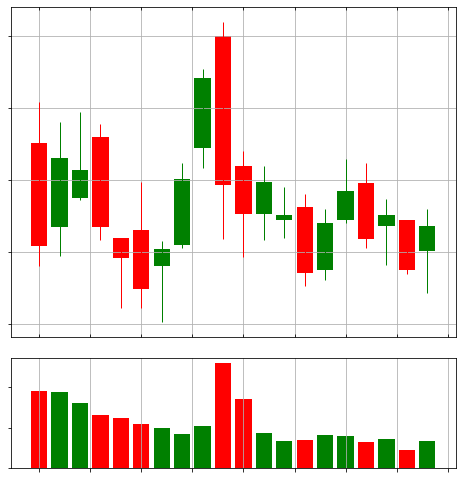

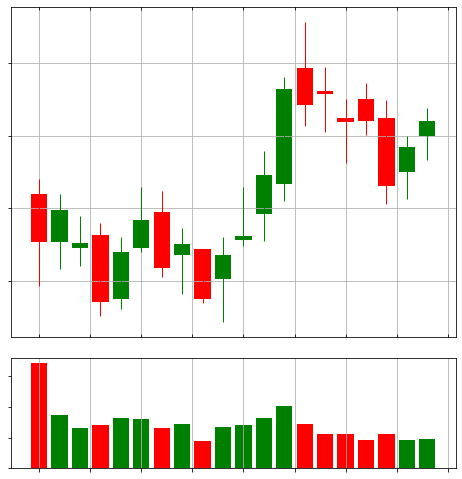

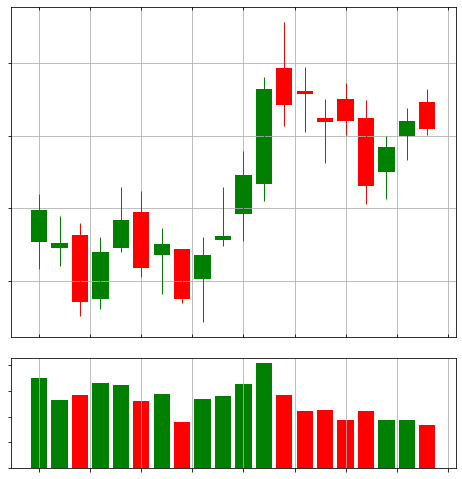

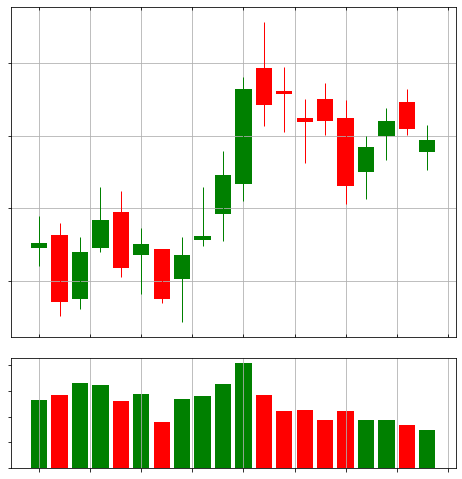

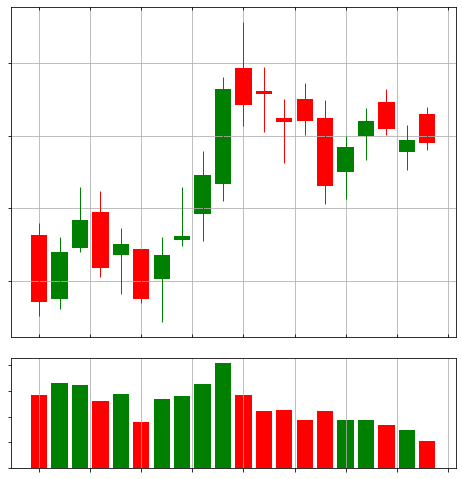

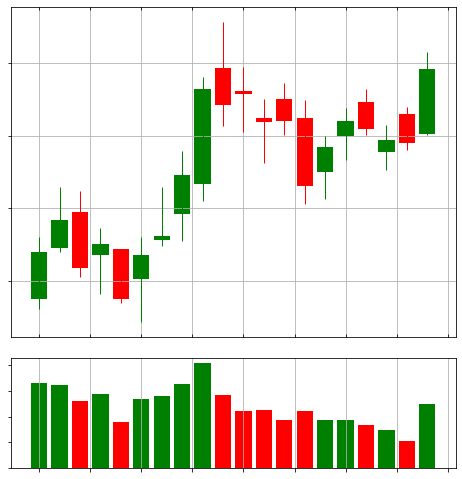

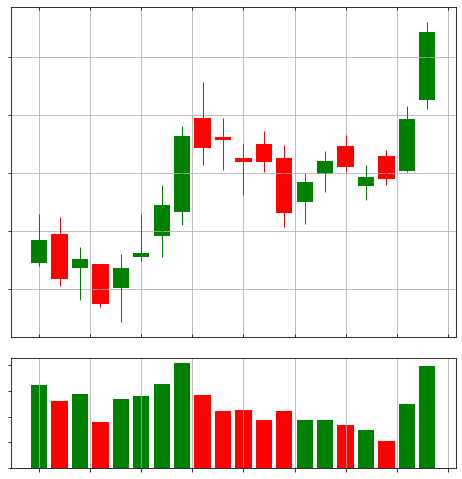

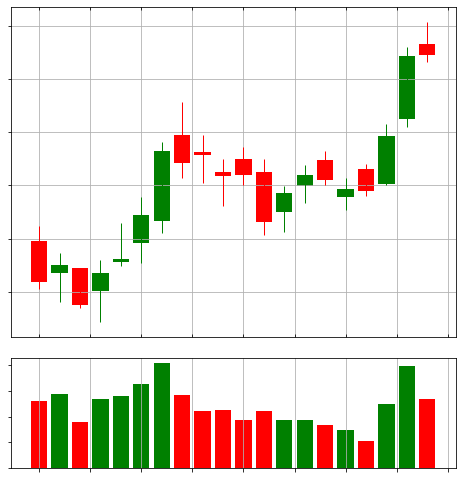

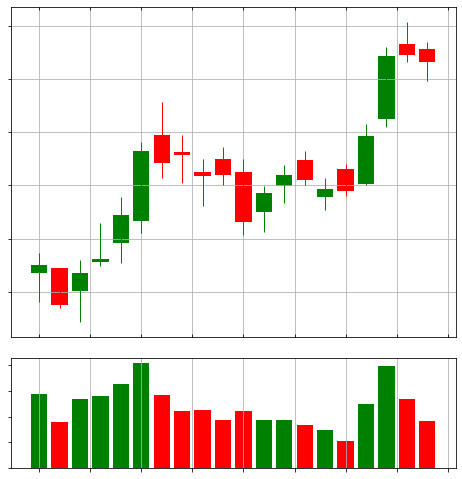

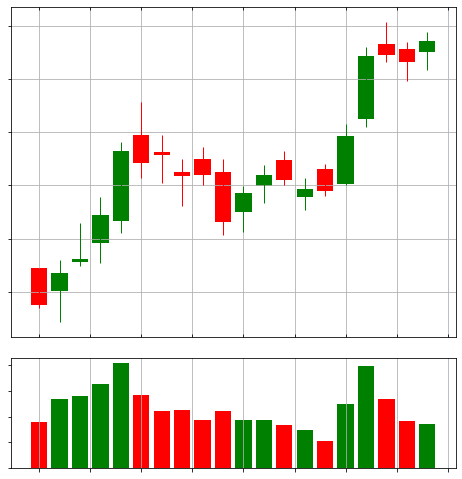

In [97]:
equities=['BAJFINANCE','RELIANCE','INFY','HDFC','HDFCBANK','HDFCLIFE','ZEEL','DELTACORP','ITC','ASIANPAINT']
for equity in equities :
    df_pricing=obtain_data(equity,date(2018,1,1),date(2020,9,1))
    df=df_pricing.copy()
    df=df.reset_index(drop=True)
    n_days=5
    fraction_movement=0.037
    df['Trend']=None
    for i in range(len(df)):
        try :
            for n in range(n_days): 
                if  df.loc[i,'close_price'] - df.loc[i+n,'close_price'] >= fraction_movement*df.loc[i,'close_price']:
                    df.loc[i,'Trend'] ='Down'
                    if i >=20 :
                        fig=plot_candles(df_pricing[i-20:i],volume_bars=True)
                        fig.savefig('Candle Data/Down/{0}{1}.png'.format(df_pricing['Symbol'][i],i),dpi=70)
                    print('Down',i,n)
                    break
                elif df.loc[i+n,'close_price'] - df.loc[i,'close_price'] >= fraction_movement*df.loc[i,'close_price'] :
                    df.loc[i,'Trend']='Up'
                    if i >20 :    
                        fig=plot_candles(df_pricing[i-20:i],volume_bars=True)
                        fig.savefig('Candle Data/Up/{0}{1}.png'.format(df_pricing['Symbol'][i],i),dpi=70)
                    print('Up',i,n)
                    break
                else :
                    df.loc[i,'Trend']= 'No Trend'
        except :
            print(i)
            pass

In [93]:
df_pricing['Symbol'][i]

'BAJFINANCE'